In [1]:
# обновление библиотеки matplotlib
# !pip install matplotlib --upgrade


In [2]:
# загрузка библиотек
# !pip install geopandas
# !pip3 install contextily

In [3]:
# import fiona

# Chicago's movies. Introduction
This project is dedicated to movies were filmed in Chicago (USA) and about Movies in the Parks events in 2014-2019 based on data from [Chicago Data portal](https://data.cityofchicago.org/) 

## Aim
**Aim of project** - explore Chicago's film industry and city's movie viewing data

## Tasks
**Project tasks is expressed in the form of questions**:
1. What are the main socio-economic indicators of Chicago as city?
2. What is the dynamics of the number of films made in Chicago: maximum, minimum, average number of films, etc.?
3. What kind of films are made in Chicago: what genre, what duration, what budget, what audience rating (according to [TMDB](https://www.themoviedb.org/?language=en))?
4. Which parks have the most movie nights in Chicago?
5. Is there a correlation between the films that are made in Chicago and those that are shown at movie nights in the parks in the city?

## Hypotheses
1. The number of films made in Chicago is growing every year.
2. Films shot in Chicago are dominated by the "drama" genre.
3. Among the films shown in city parks, the most common genre is "family"
4. Films that are made and shown in parks are generally similar in terms of budget and profits.

# The main socio-economic indicators of Chicago as city

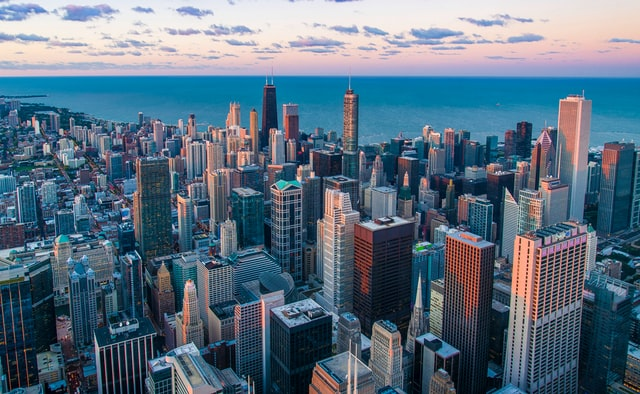

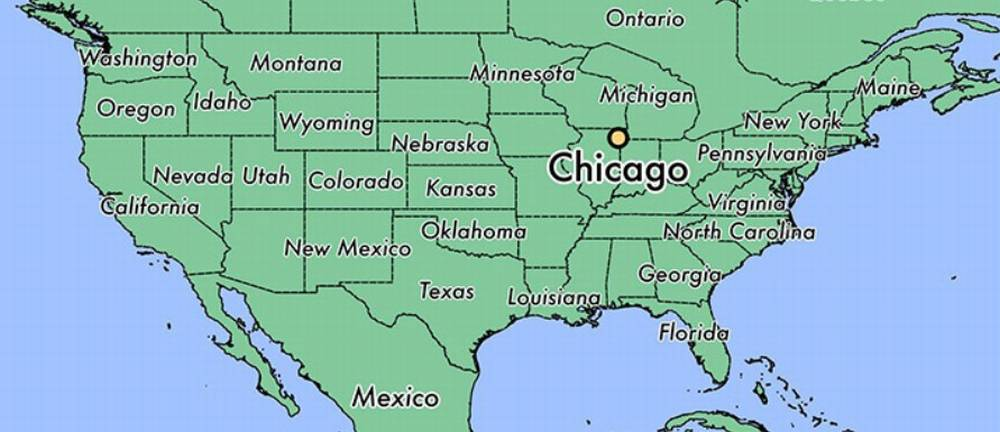

**Chicago** is the most populous city in the State of Illinois, and the third-most populous city in the United States, following New York City and Los Angeles. 

As a multicultural city that thrives on the harmony and diversity of its neighborhoods, Chicago today embodies the values of America's heartland-integrity, hard work and community and reflects the ideals in the social fabric of  its 77 distinct neighborhoods.

In [4]:
# starting with importing libraries are needed for this project
import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup
import re

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## *What are the main socio-economic indicators of Chicago as city?*
The socio-economic characteristics of the city is taken from the site [City town info](https://www.citytowninfo.com/places/illinois/chicago). In the below table present the most important and interesting indicators.

In [5]:
url_chicago_info = "https://www.citytowninfo.com/places/illinois/chicago"
response = requests.get(url_chicago_info)
soup_chicago_info = BeautifulSoup(response.text, 'html.parser')
chicago_info = soup_chicago_info.find_all('table',{'class':"tableNewDesign"})
info_all = pd.read_html(str(chicago_info))

In [6]:
# we want to take first four tables and concat into one

table = [pd.DataFrame(t) for t in info_all[:4]]

chicago_soc_econ_info = pd.concat(table).set_axis(['indicator', 'numerical_measure'], axis=1, inplace=False).set_index('indicator')
chicago_soc_econ_info

numerical_measure
indicator                                                          
Total Population                                            2718555
Male Share of the Population                                  48.6%
Female Share of the Population                                51.4%
Senior Citizens                                                 12%
Employed Population 16+                                     1310127
Age of the Population                                            34
% of people married                                           35.1%
Average household size                                            3
Population % with Bachelor Degree or Higher                     42%
Median Earnings25+                                          $41,238
Median Earnings Without High School Qualification           $22,652
Median Earnings With High School Degree                     $27,003
Median Family Income                                        $64,997
% Above Poverty Level                                         80.5%
% Below Poverty Level                                         19.5%

In [7]:
# change column type 'Numerical_measure' from object to float
chicago_soc_econ_info['numerical_measure'] = (chicago_soc_econ_info['numerical_measure'].str.replace('[%|$|,]', '', regex=True)).astype(float)

In [8]:
chicago_soc_econ_info

numerical_measure
indicator                                                           
Total Population                                           2718555.0
Male Share of the Population                                    48.6
Female Share of the Population                                  51.4
Senior Citizens                                                 12.0
Employed Population 16+                                    1310127.0
Age of the Population                                           34.0
% of people married                                             35.1
Average household size                                           3.0
Population % with Bachelor Degree or Higher                     42.0
Median Earnings25+                                           41238.0
Median Earnings Without High School Qualification            22652.0
Median Earnings With High School Degree                      27003.0
Median Family Income                                         64997.0
% Above Poverty Level                                           80.5
% Below Poverty Level                                           19.5

In [9]:
# explore ancestries of citizens
info_ancestry = pd.DataFrame(info_all[6]).set_axis(['race', 'population'], axis=1)
info_ancestry['population'] = info_ancestry['population'].str.replace('%','').astype(float)
sum_procent = info_ancestry[info_ancestry['population'] < 3]['population'].sum()
other_row = {'Race':'Others (<1%)', 'population':sum_procent}
info_ancestry = info_ancestry[info_ancestry['population'] >= 3].append(other_row, ignore_index=True)

On average, the average family from Chicago (of 3 people) has a wealth of about 64,997 per year. For example, real median income for families is $84,088 in 2020 ([source](https://www.thebalance.com/what-is-average-income-in-usa-family-household-history-3306189)).

In Chicago, almost half (42%) of the population have a higher education. 

For comparison the richest city in America have median income of about $ 110,040 and 50,1%  of adults with at least a bachelor’s degree ([source](https://www.usatoday.com/story/money/economy/2018/05/17/25-richest-cities-in-america/34991163/))

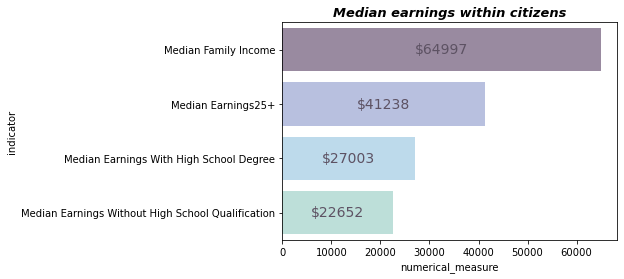

In [10]:
colors = ['#9A86A4', '#B1BCE6', '#B6DCF2', '#B7E5DD', '#B6F2C6', '#F1F0C0', '#F9ECBB']
df_earnings = chicago_soc_econ_info.iloc[9:13].sort_values(by='numerical_measure', ascending=False).reset_index()

ax = sns.barplot(data=df_earnings, x='numerical_measure', y='indicator', palette=colors)
ax.bar_label(ax.containers[0], label_type='center', color='#5D5263', fontsize=14, fmt='$%.0f')
ax.set_title('Median earnings within citizens', fontsize=13, style='oblique', weight='bold')
plt.show()

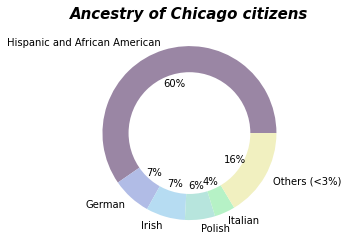

In [11]:
labels = ['Hispanic and African American', 'German', 'Irish', 'Polish', 'Italian', 'Others (<3%)']

plt.pie(info_ancestry['population'], autopct='%.0f%%', labels=labels, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Ancestry of Chicago citizens', fontsize=15, style='oblique', weight='bold')
plt.show()

It seems as most of the population comes from Hispanic and African-American roots (60%). The remaining "roots" have less than 10%. For example, 1% of Chicago residents have Russian roots.

## **Summary**

> Chicago is a city in the USA with a population of almost 3 million people

> The average age of a Chicago resident is 34 years, 52% of the population are women, only 12% of the city's residents are retired

> The median income of a family of 3 people is 65 thousand dollars per year. Only 35% of residents are registered in an official marriage

> Most of the population has Latin and African-American roots

# **Films shot in Chicago**

The Chicago film industry is a central hub for film production and showings, which was created before Hollywood became the undisputed capital of cinema. **In the early 1900s, Chicago had the largest number of production companies and directors.**

In the 1980s and the beginning of the 21st century that there was no beneficial changes of filmmaking in Chicago. 

In the 21st century, the revival of cinema began again in Chicago due to a tax law that the state of Illinois passed to **provide filmmakers with a 30% tax discount on production costs**.

### *What is the dynamics of the number of films made in Chicago?*
Для ответа на данный вопрос соберем информацию с сайта [Правительства Чикаго](https://www.chicago.gov/city/en/depts/dca/supp_info/chicago_film_office6.html) при помощи scrapping веб-страницы

In [12]:
url = "https://www.chicago.gov/city/en/depts/dca/supp_info/chicago_film_office6.html"
response = requests.get(url)
film_soup = BeautifulSoup(response.text, 'html.parser')
film_tables = film_soup.find_all('table')
film_years = film_tables[1].find_all('h3')
film_data = []

for year in film_years:
    year_text = year.get_text()
    ul = year.next_sibling.next_sibling
    film_names = [name.get_text() for name in ul.find_all('li')]
    for film in film_names:
        row = [year_text, film]
        film_data.append(row)

movies_filmed_in_chicago = pd.DataFrame(film_data, columns=['year', 'movie_name'])
movies_filmed_in_chicago.head()                   

year           movie_name
0  2021      8-Bit Christmas
1  2021   Christmas …Again?!
2  2021  Good Guy With A Gun
3  2021     Hot Mess Holiday
4  2021      Merry Switchmas

In [13]:
# change column 'year' type from object to integer.
movies_filmed_in_chicago['year'] = movies_filmed_in_chicago['year'].astype(int)
movies_filmed_in_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        800 non-null    int32 
 1   movie_name  800 non-null    object
dtypes: int32(1), object(1)
memory usage: 9.5+ KB


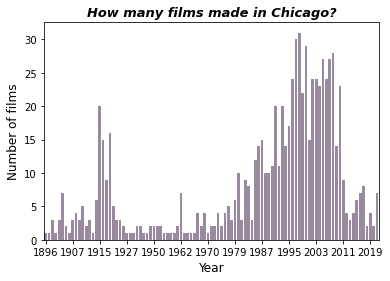

In [14]:
movies_filmed_in_chicago_bar = movies_filmed_in_chicago.groupby('year').count().sort_values(by='year').reset_index()

ax = sns.barplot(x='year', y='movie_name', data=movies_filmed_in_chicago_bar, color='#9A86A4')
ax.set_ylabel('Number of films', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_title('How many films made in Chicago?', fontsize=13, style='oblique', weight='bold')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.show()

The graph shows how in the early 1900s there was an increase in film production in Chicago.

After that, rapid growth began already in the 21st century, after the introduction of tax preferences for film producers.

However, one can observe a strong decline in the last 10 years in the number of films shot in Chicago, which can be explained by a combination of factors: the global economic crisis of 2007-2008 and the coronavirus pandemic.

In [15]:
info_movies_filmed_in_chicago_years = movies_filmed_in_chicago.groupby('year').count().sort_values(by='movie_name', ascending=False).reset_index()

print(f'Most of the films in Chicago were shot in {info_movies_filmed_in_chicago_years.iloc[0].year} - {info_movies_filmed_in_chicago_years.iloc[0].movie_name} films.')

print(f'\nMost of the films were shot in {info_movies_filmed_in_chicago_years.iloc[-1].year} - {info_movies_filmed_in_chicago_years.iloc[-1].movie_name} films.')

print(f'\nOn average, they shoot in Chicago {int(info_movies_filmed_in_chicago_years.movie_name.mean())} films per year')

Most of the films in Chicago were shot in 1998 - 31 films.

Most of the films were shot in 1896 - 1 films.

On average, they shoot in Chicago 8 films per year


## *What kind of films are made in Chicago?*
[API of TMDB](https://www.themoviedb.org/documentation/api) is used.

In [16]:
# functions to check the correctness of the data
from datetime import datetime

def is_correct_title(movie_name, title):
    return str(movie_name).lower().strip() == title.lower().strip()

def is_correct_date(release_date_str):
    if release_date_str == '':
        return False
    try:
        release_date = datetime.strptime(release_date_str, '%Y-%m-%d')
        return True
    except ValueError:
        return False

In [17]:
# код закомментирован, так как его выполнение занимает примерно 4 минуты
# для повторного доступа к данным сохраним csv

api_key = 'e8024b5edf32a184ac1fa37cab202997'

data = []

for i, r in movies_filmed_in_chicago.iterrows():
    row = []
    movie_name = r['movie_name']
    movie_year = r['year']
    search_raw_response = requests.get('https://api.themoviedb.org/3/search/movie', params={'api_key': api_key, 'query': movie_name})
    search_response = search_raw_response.json()
    results = search_response['results']
    if len(results) == 0:
        continue
    movie = results[0]
    title = movie['title']
    if is_correct_title(movie_name, title):
        id = movie['id']
        movie_raw_response = requests.get('https://api.themoviedb.org/3/movie/' + str(id), params={'api_key': api_key})
        movie_response = movie_raw_response.json()
        release_date = movie_response['release_date']
    if not is_correct_date(release_date):
          continue
    budget = movie_response['budget']
    genres = [genre['name'] for genre in movie_response['genres']]
    vote_average = movie_response['vote_average']
    revenue = movie_response['revenue']
    runtime = movie_response['runtime']
    row.extend([movie_name, budget, ', '.join(genres), vote_average, revenue, runtime, release_date])
    data.append(row)

movies_tmdb_data = pd.DataFrame(data, columns=['movie_name', 'budget', 'genres', 'vote_average', 'revenue', 'runtime', 'release_date'])
movies_tmdb_data.tail()

movie_name  budget       genres  \
603                      Gans-McGovern Fight       0  Documentary   
604                         A Chicago Street       0  Documentary   
605                         Soldiers at Play       0  Documentary   
606  Corner Madison & State Streets, Chicago       0  Documentary   
607                    The Tramp and the Dog       0       Comedy   

     vote_average  revenue  runtime release_date  
603           4.8        0      1.0   1896-09-20  
604           4.8        0      1.0   1896-09-20  
605           4.8        0      1.0   1896-09-20  
606           4.8        0      1.0   1896-09-20  
607           0.0        0      1.0   1896-01-01

Information about dataset:
*   **movie_name** - movie name
*   **budget** - budget of film
*   **genres** - genres of film
*   **vote_average** - viewer score from TMDB
*   **revenue** - profit of film
*   **runtime** - duration of film
*   **release_date** - release date

In [18]:
movies_tmdb_data = movies_tmdb_data.drop_duplicates(subset = ['movie_name']).dropna().reset_index(drop=True)

In [19]:
movies_tmdb_data['budget'] = movies_tmdb_data['budget'].astype(int)
movies_tmdb_data['revenue'] = movies_tmdb_data['revenue'].astype(int)
movies_tmdb_data['runtime'] = movies_tmdb_data['runtime'].astype(float)
movies_tmdb_data['release_date'] = pd.to_datetime(movies_tmdb_data['release_date'], format='%Y-%m-%d')

In [20]:
# last 7 films shot in Chicago
movies_tmdb_data.sort_values(by='release_date', ascending=False).head(7)

movie_name  budget          genres  vote_average  revenue  \
249                 Smile       0          Horror           0.0        0   
6        The Year Between       0           Drama           0.0        0   
7         Christmas Again       0           Drama           0.0        0   
255                  Lamb       0           Drama           4.4        0   
295  A Day in the Country       0     Documentary           0.0        0   
180  Cheaper by the Dozen       0  Family, Comedy           6.3        0   
181        Connie & Carla       0  Family, Comedy           6.3        0   

     runtime release_date  
249      0.0   2022-09-28  
6       94.0   2022-06-12  
7       94.0   2022-06-12  
255     15.0   2022-06-12  
295     18.0   2022-05-10  
180    107.0   2022-03-18  
181    107.0   2022-03-18

In [21]:
# function for displaying movies with an ordinal number
def print_indexed_item(list_of_items):
    for count, ele in enumerate(list_of_items, 1):
        print(f'{count}. {ele}')

In [22]:
# let's clear the dataset of movies with incomplete data
movies_tmdb_data = movies_tmdb_data.query('(revenue>0) & (budget>0) & (runtime>0.0)')

In [23]:
print('Top 5 Most expensive films produced in Chicago:') 
print_indexed_item(list(movies_tmdb_data.sort_values(by='budget', ascending=False).movie_name.head()))
print('Average cost of film production:', "${:,.0f}".format(int(movies_tmdb_data['budget'].mean())))

mean_revenue = int(movies_tmdb_data['revenue'].mean())
print(f'\nTop 5 most profitable films shot in Chicago:')
print_indexed_item(list(movies_tmdb_data.sort_values(by='revenue',ascending=False).movie_name.head()))
print('Average movie revenue:', "${:,.0f}".format(mean_revenue))

print('\nTop 5 high-rated films on TMDB shot in Chicago:') 
print_indexed_item(list(movies_tmdb_data.sort_values(by='vote_average', ascending=False).movie_name.head()))
print(f'Average score of film - {int(movies_tmdb_data["vote_average"].mean())}') 

Top 5 Most expensive films produced in Chicago:
1. Batman v Superman: Dawn of Justice
2. The Batman
3. The Dark Knight
4. Dhoom3
5. Transformers 4
Average cost of film production: $38,956,080

Top 5 most profitable films shot in Chicago:
1. The Dark Knight
2. Batman v Superman: Dawn of Justice
3. The Batman
4. Ocean's Eleven
5. Pages
Average movie revenue: $100,315,462

Top 5 high-rated films on TMDB shot in Chicago:
1. The Dark Knight
2. Beginning of the End
3. The Sting
4. North by Northwest
5. The Batman
Average score of film - 6


In [24]:
# output information on the duration of films
movie_minute = movies_tmdb_data.sort_values(by='runtime', ascending=False).reset_index()

hour = 60
movie_max_hour = movie_minute['runtime'][0] // hour
movie_max_minute_new = movie_minute['runtime'][0] % hour
print(f'The longest movie: {int(movie_max_hour)} hours {int(movie_max_minute_new)} minutes - {movie_minute["movie_name"][0]}')

movie_minute = movies_tmdb_data.sort_values(by='runtime', ascending=True).reset_index()

movie_min_minute_new = movie_minute['runtime'][0] % hour
print(f'\nThe shortest movie: {movie_minute["movie_name"][0]} - {int(movie_min_minute_new)} minutes')

print(f'\nOn average, a film shot in Chicago lasts {int(movies_tmdb_data["runtime"].mean() // hour)} час {int(movies_tmdb_data["runtime"].mean() % hour)} минут')

The longest movie: 2 hours 57 minutes - The Batman

The shortest movie: The Perfect Circle - 8 minutes

On average, a film shot in Chicago lasts 1 час 51 минут


In [25]:
# we selected top-10 by TMDB score Horror movies to explore duration of good horror
genre = 'Horror'
horror_movies_top_rated = movies_tmdb_data[(movies_tmdb_data['genres'].str.find(genre)!=-1)&(movies_tmdb_data['vote_average']>=6.0)].sort_values(by='vote_average', ascending=False).head(10)

print(f'The average duration of a good horror, according to viewers score on TMDB: {int(horror_movies_top_rated["runtime"].mean() // hour)} hour {int(horror_movies_top_rated["runtime"].mean() % hour)} minutes')

The average duration of a good horror, according to viewers score on TMDB: 1 hour 47 minutes


One can make an assumption that if the horror goes on for more than 1 hour 45 minutes, then the film will not have a great response from the public - they just won't want to be scared for too long.

In our data frame, the genre column consists of variables of the string type. In order to count the number of genres (to highlight the most popular ones), we divided the lines into a list, after which we created a single list from the list of lists, in which we used Counter to output the number of each genre in the form of a dictionary. For a more convenient perception of the received data, the dictionary was translated using pandas into a dataframe

In [26]:
from collections import Counter
raw_genres = list(movies_tmdb_data['genres'])
splitted_genres = [genres.split(', ') for genres in raw_genres]
data = sum(splitted_genres, [])
genres_dic = Counter(data)
df_genres = pd.DataFrame.from_dict(genres_dic, orient='index', columns=['count_genre'])
df_genres.sort_values(by='count_genre', ascending=False)

count_genre
Drama                    106
Comedy                    82
Thriller                  59
Romance                   50
Crime                     45
Action                    43
Mystery                   25
Horror                    21
Adventure                 19
Science Fiction           18
Family                    13
Fantasy                   12
Music                     10
History                    7
War                        2
Documentary                2
Animation                  1
Western                    1

The most popular genre among films shot in Chicago is drama. Next comes a comedy and a thriller

---

*Portrait of a typical movie that was shot in Chicago*

> Drama filmed in 1998

> Cost of production - $38,852,780

> Profit - $94,270,465

> Duration: 1 hour 51 minutes

---

C:\Users\pkopt\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pkopt\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


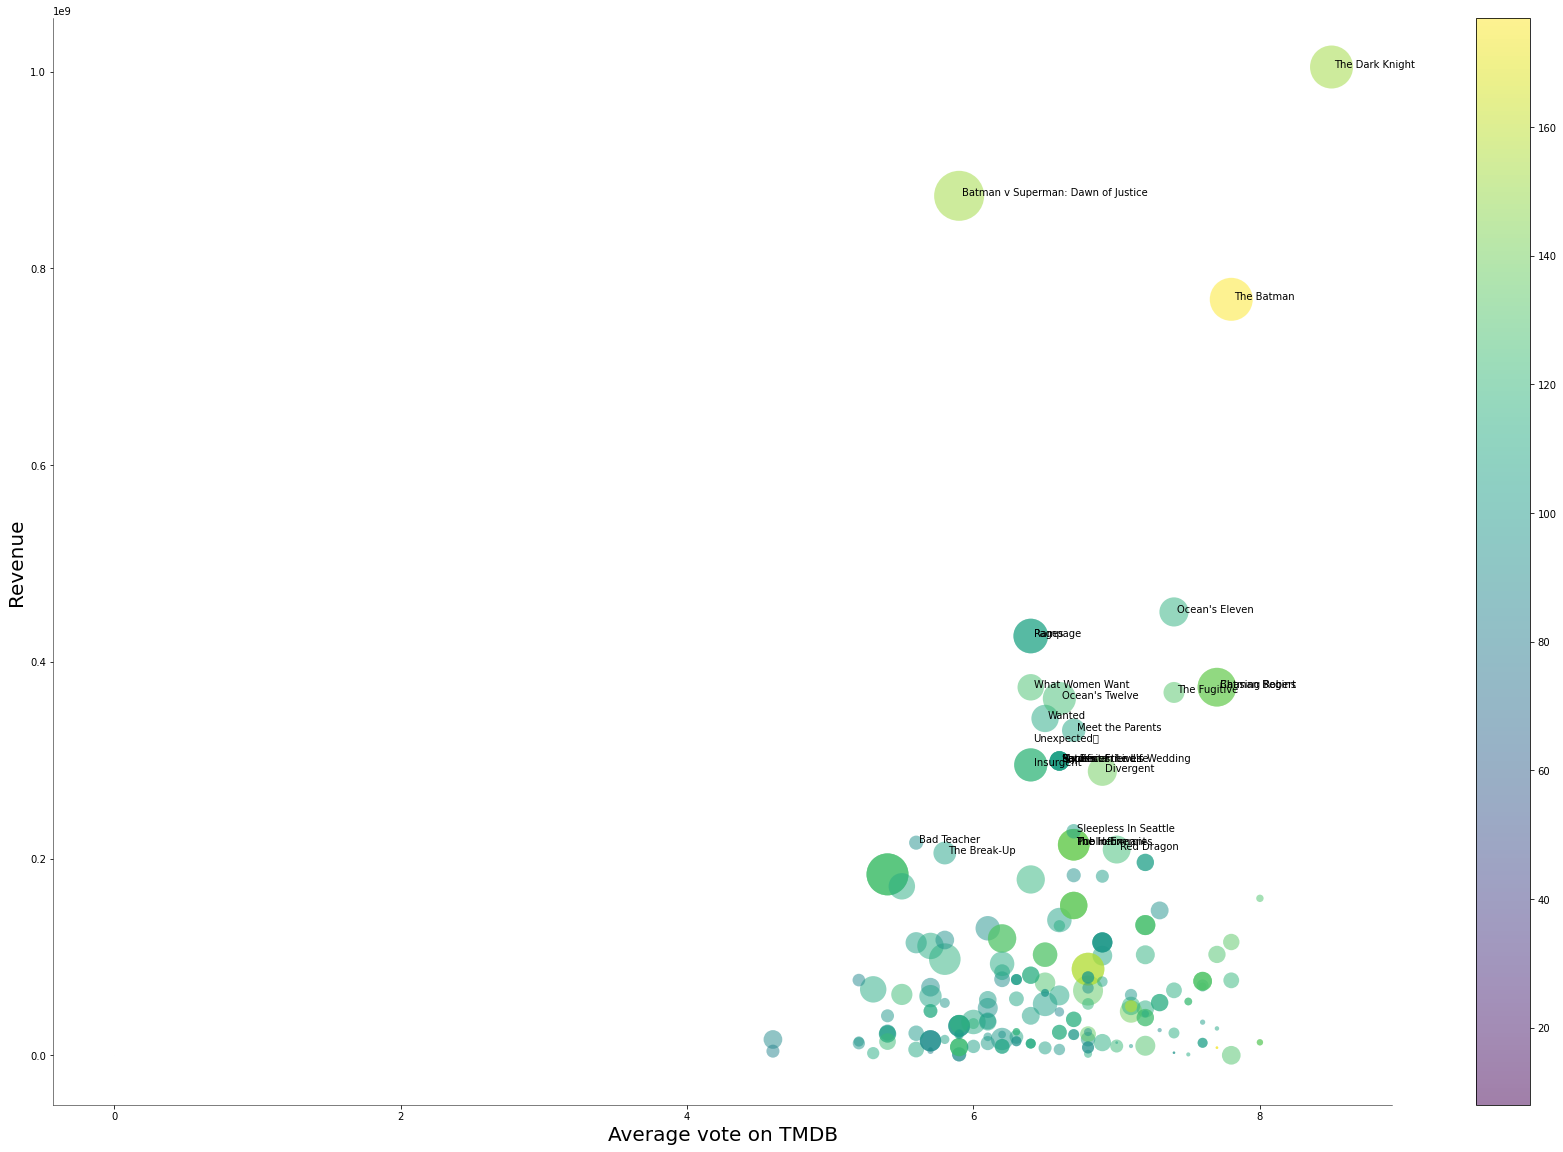

In [27]:
# let's plot the relationship between the popularity of the film on TMDB and the profit of the film 
# we scale on a budget
# let's add a variable of the duration of the movie for clarity

fig, ax = plt.subplots(figsize=(30,20))

movie_scatter_graph = ax.scatter(movies_tmdb_data['vote_average'], movies_tmdb_data['revenue'], s=movies_tmdb_data['budget']/100000, c=movies_tmdb_data['runtime'], cmap='viridis', alpha=0.5, linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.set_xlabel('Average vote on TMDB', fontsize=20)
ax.set_ylabel('Revenue', fontsize=20)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['y'] < mean_revenue*2:
            continue
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(movies_tmdb_data['vote_average'], movies_tmdb_data['revenue'], movies_tmdb_data['movie_name'], plt.gca())                 
plt.colorbar(movie_scatter_graph)
plt.show()

According to the graph, 3 films stand out, all of which have a high rating on TMDB and have a large profit: "The Dark Knight", "Batman v Superman: Dawn of Justice" and "Batman". 

Interestingly, all Batman-related movies also have a big budget and last more than two hours.

## **Summary**

**What is the dynamics of the number of films made in Chicago: maximum, minimum, average number of films, etc.?**

> The major part of films were shot in Chicago in 1998 - 31 films.

> The least number of films were made in 1896 - 1 film.

> On average, 8 films are shot in Chicago per year
---

**What kind of films are made in Chicago: what genre, what duration, what budget, what audience rating (according to [TMDB](https://www.themoviedb.org/?language=en))?**

*Portrait of a typical movie that was shot in Chicago*

> Drama filmed in 1998

> Cost of production - $38,852,780

> Profit - $94,270,465

> Duration: 1 hour 51 minutes


# **Films shown in Chicago parks**

In Chicago, "movie night" is often arranged at various city venues (parks). These events are officially registered with the Administration. Can we say that these films reflect the general trends of the city's film industry? Let's analyze these films.

To do this, we concate a common dataset with films shown in Chicago parks from 2014 to 2019. Data for each year is presented on the [Chicago data portal](https://data.cityofchicago.org /).

Download them from site, place them on Google Drive, read them and convert them to a dataframe using the *pandas* library.

In [28]:
def read_film_park_data(url):
    file_id=url.split('/')[-2]
    dwn_url='https://drive.google.com/uc?id=' + file_id
    return pd.read_csv(dwn_url)

In [30]:
df_2014_films = read_film_park_data('https://drive.google.com/file/d/1BMexWFzQhTbzbwSykBoFi94f4GVd7bO-/view?usp=sharing')
df_2015_films = read_film_park_data('https://drive.google.com/file/d/1lXel3M5eAoa-EGIcXmeToVN-rsTffUnq/view?usp=sharing')
df_2016_films = read_film_park_data('https://drive.google.com/file/d/1WHDa71U3JF-n0YnGjdrdk_t6Uuy1sr7i/view?usp=sharing')
df_2017_films = read_film_park_data('https://drive.google.com/file/d/1DuudClio6OTavArVXELYLMhma3SIyOod/view?usp=sharing')
df_2018_films = read_film_park_data('https://drive.google.com/file/d/1TTwzI7cZNeaKvZQk7yWi_VwecD54aS5R/view?usp=sharing')
df_2019_films = read_film_park_data('https://drive.google.com/file/d/1NT_MYtG7-XP0WYr6U3yY2NaDjaM2ikqE/view?usp=sharing')

columns = ['movie_name', 'location_park', 'movie_rating', 'year']

df_2019_films = df_2019_films.loc[:, ['Title','Park','Rating']]
df_2019_films['year'] = 2019
df_2019_films = df_2019_films.set_axis(columns, axis=1, inplace=False)

df_2018_films = df_2018_films.loc[:, ["Title","Park","Rating"]]
df_2018_films['year'] = 2018
df_2018_films = df_2018_films.set_axis(columns, axis=1, inplace=False)

df_2017_films = df_2017_films.loc[:, ["Title","Park","Rating"]]
df_2017_films['year'] = 2017
df_2017_films = df_2017_films.set_axis(columns, axis=1, inplace=False)

df_2016_films = df_2016_films.loc[:, ["MovieName","Location","MovieRating"]]
df_2016_films['year'] = 2016
df_2016_films = df_2016_films.set_axis(columns, axis=1, inplace=False)

df_2015_films = df_2015_films.iloc[:, [1,2,13]]
df_2015_films['year'] = 2015
df_2015_films = df_2015_films.set_axis(columns, axis=1, inplace=False)

df_2014_films = df_2014_films.iloc[:, [1,2,11]]
df_2014_films['year'] = 2014
df_2014_films = df_2014_films.set_axis(columns, axis=1, inplace=False)

frames = [df_2014_films,df_2015_films,df_2016_films,df_2017_films,df_2018_films,df_2019_films]
df_info_film_2014_2019 = pd.concat(frames)
df_info_film_2014_2019.head()

movie_name           location_park movie_rating  \
0                           Fireproof             Beverly Park           PG   
1                          The Goonies           Holstein Park           PG   
2                      Despicable Me 2             Dvorak Park           PG   
3  Cloudy With a Chance of Meatballs 2  White (Willye B.) Park           PG   
4                      Despicable Me 2            Stanton Park           PG   

   year  
0  2014  
1  2014  
2  2014  
3  2014  
4  2014

Information about dataset:
*   **movie_name** - movie name 
*   **location_park** - movie night park name
*   **movie_rating** - rating [MPAA](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system)
*   **year** - year of movie night

When working with data frames it turned out that the same parks have several names. Due to the small number of notation options, it was decided to form a dictionary with manual substitutions, rather than develop an automated algorithm to eliminate collisions.

In [31]:
location_to_replace_dict = {"Veterans' Memorial Park": "Veteran's Memorial Park",
'Ward (A. Montgomery) Park': 'A. Montgomery Ward Park' ,
'Ward (Aaron Montgomery) Park': 'A. Montgomery Ward Park',
'Ward, A. Montgomery Park': 'A. Montgomery Ward Park',
'Austin Town Hall': 'Austin Town Hall Park',
'Bartelme, Mary Park': 'Bartelme (Mary) Park',
'Berger Park Cultural Center': 'Berger Park',
'Webster Park': 'Daniel Webster Park',
'Douglas Park Cultural and Community Center': 'Douglas Park',
'Ellis Park': 'Ellis (Samuel) Park',
'Field (Eugene) Park': 'Eugene Field Park',
'Garfield Park Conservatory': 'Garfield Park',
'Grant Park: Grove 5': 'Grant Park',
'Grant Park: Logan Monument': 'Grant Park',
'Washington Park': 'Harold Washington Playlot Park',
'Heritage Green Park': 'Heritage Green',
'Indian Boundary Park and Cultural Center': 'Indian Boundary Park',
'Jesse White Community Center and Fieldhouse': 'Jesse White Community Center',
'Jonquil Park': 'Jonquil Playlot Park',
'LeClaire Courts/Hearst Community': 'LeClaire Courts-Hearst Community Park',
'Lincoln Park Cultural Center': 'Lincoln Park',
'Lincoln Park: South Field': 'Lincoln Park',
'Maplewood Playlot Park': 'Maplewood Park',
'Margate Park Fieldhouse': 'Margate Park',
'Northerly Island': 'Northerly Island Park',
'Ogden park': 'Ogden Park',
'Ping Tom Park': 'Ping Tom Memorial Park',
'Revere park': 'Revere Park',
'Smith Park': 'Smith (Wendell) Playlot Park',
'Smith Playlot Park': 'Smith (Wendell) Playlot Park',
'Taylor-Lauridsen Playground Park': 'Taylor Park',
'Touhy Park': 'Touhy-Herbert Park',
'Wentworth Park': 'Wentworth Gardens Park',
'Wilson Frank J. Park': 'Wilson (Frank J.) Park'}

df_info_film_2014_2019.replace(to_replace=location_to_replace_dict, inplace=True)

In [32]:
# count NaNs
df_info_film_2014_2019.isna().sum()

movie_name        3
location_park     0
movie_rating     17
year              0
dtype: int64

In [33]:
# replace NaN's
df_info_film_2014_2019.dropna(subset=['movie_name'], inplace=True)
df_info_film_2014_2019 = df_info_film_2014_2019.fillna("unknown")
df_info_film_2014_2019.isna().sum()

movie_name       0
location_park    0
movie_rating     0
year             0
dtype: int64

## *Which parks have the most movie nights in Chicago?*

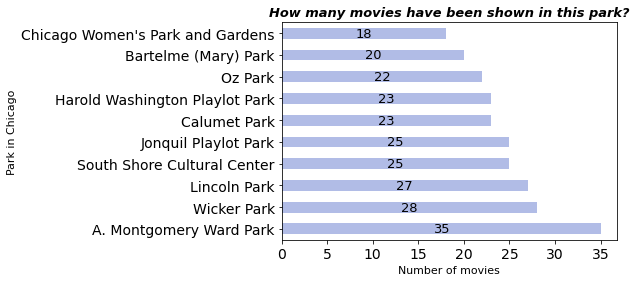

In [34]:
# graph by the number of films in parks
film_2014_2019_bar = df_info_film_2014_2019.groupby('location_park').count().sort_values(by='movie_name', ascending=False).head(10)
fr = film_2014_2019_bar.plot.barh(y='movie_name', rot=0, color='#B1BCE6', fontsize=14, legend=None)
fr.set_ylabel('Park in Chicago', fontsize=11)
fr.set_xlabel('Number of movies', fontsize=11)
fr.set_title('How many movies have been shown in this park?', fontsize=13, style='oblique', weight='bold')
plt.bar_label(fr.containers[0], fontsize=13, label_type='center')
plt.show()

The most popular park [A. Montgomery Ward Park](https://www.chicagoparkdistrict.com/parks-facilities/ward-montgomery-park ) (photo below)

The Chicago administration worked with two design firms to develop this place. The park plan emphasizes that **the Chicago River is the main asset of the territory**

The park has a promenade with benches and trees, offering a breathtaking view of the water and the horizon. 

The park also has a large playground, an adjacent area for dogs and two works of art - a beautiful mosaic wall by the river and a stainless steel sculpture called "Memorial Ground Ring"

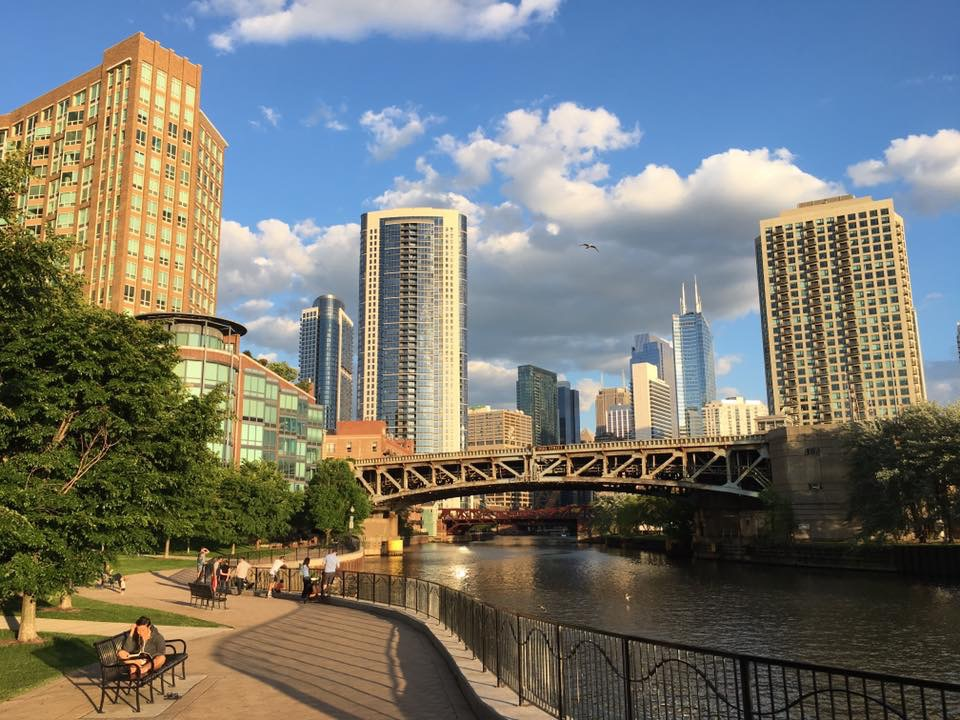

На сайте [Chicago data portal](https://data.cityofchicago.org/) также представлены Shapefiles для работы с картами (границы парков)

Воспользуемся библиотеками `geopandas` (работа с геоданными) и `contextily` (карта на бэкграунде)

Из-за того, что написание парков в shp file и нашем df сильно отличалось, то мы вручную выписали необходимые нами индексы

In [35]:
# # покажем на карте расположение парков
# import geopandas
# import contextily as cx

# gdf_chicago_parks = geopandas.read_file('chicago-parks.shp')
# gdf_chicago_parks_wm = gdf_chicago_parks.to_crs(epsg=3857)

# parks_id = [336, 126, 62, 288, 582]
# gdf_chicago_top_parks_wm = gdf_chicago_parks_wm.iloc[parks_id]

# gdf_chicago_top_parks_wm['coords'] = gdf_chicago_top_parks_wm['geometry'].apply(lambda x: x.representative_point().coords[:])
# gdf_chicago_top_parks_wm['coords'] = [coords[0] for coords in gdf_chicago_top_parks_wm['coords']]

# ax_parks = gdf_chicago_top_parks_wm.plot(figsize=(20,20), alpha=0.5, edgecolor='k', color='red')

# legend_x = -9747645.0

# for idx, row in gdf_chicago_top_parks_wm.iterrows():
#     coords = row['coords']
#     plt.annotate(row['label'], 
#                xy=coords, 
#                xytext=(legend_x, coords[1]+2000), 
#                horizontalalignment='center', size=15, 
#                bbox=dict(boxstyle="round", fc="none", ec="gray"), 
#                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

# cx.add_basemap(ax_parks, crs=gdf_chicago_top_parks_wm.crs.to_string())
# cx.add_basemap(ax_parks, source=cx.providers.Stamen.TonerLabels)

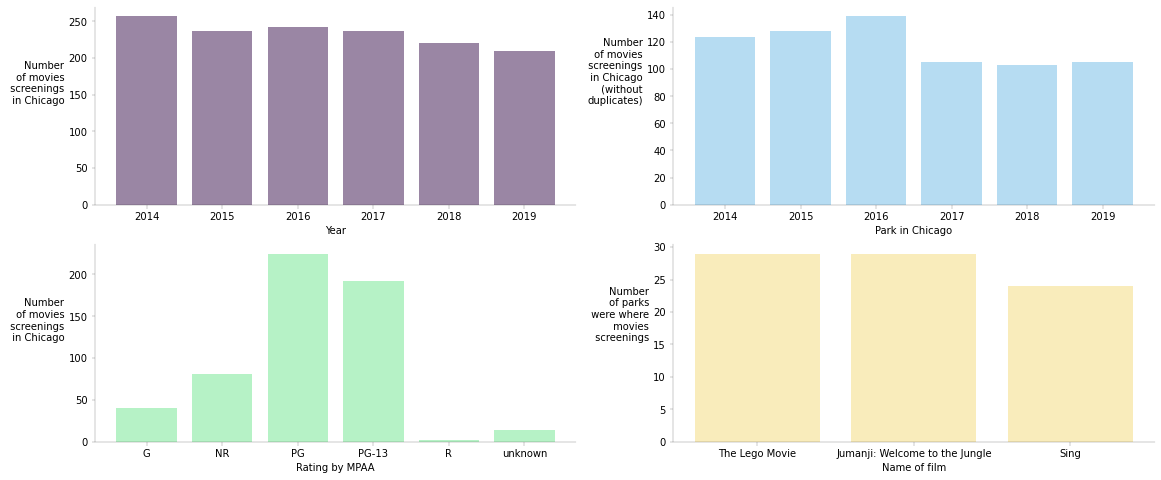

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(19,8))
for x in range(2):
    for y in range(2):
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.2)
        ax[x][y].yaxis.set_tick_params(width=0.2)
        for axis in ['top','bottom','left','right']:
            ax[x][y].spines[axis].set_linewidth(0.2)

t = df_info_film_2014_2019.groupby('year').count().sort_values(by='movie_name', ascending=False).reset_index()
ax[0][0].bar(t['year'], t['movie_name'], color=colors[0]) 
ax[0][0].set_ylabel('Number\n of movies\n screenings\n in Chicago', rotation='horizontal', ha='right')
ax[0][0].set_xlabel('Year')

t = df_info_film_2014_2019.drop_duplicates(subset=['movie_name', 'movie_rating', 'year']).groupby('year').count().reset_index()
ax[0][1].bar(t['year'], t['movie_name'], color=colors[2]) 
ax[0][1].set_ylabel('Number\n of movies\n screenings\n in Chicago\n (without\nduplicates)', rotation='horizontal', ha='right')
ax[0][1].set_xlabel('Park in Chicago')

t = df_info_film_2014_2019.drop_duplicates(subset=['movie_name', 'movie_rating']).groupby('movie_rating').count().reset_index()
ax[1][0].bar(t['movie_rating'], t['movie_name'], color=colors[4]) 
ax[1][0].set_ylabel('Number\n of movies\n screenings\n in Chicago', rotation='horizontal', ha='right')
ax[1][0].set_xlabel('Rating by MPAA')

t = df_info_film_2014_2019.groupby('movie_name').count().sort_values(by='location_park', ascending=False).reset_index().head(3)
ax[1][1].bar(t['movie_name'], t['location_park'], color=colors[6]) 
ax[1][1].set_ylabel('Number\n of parks\n were where\n movies\n screenings', rotation='horizontal', ha='right')
ax[1][1].set_xlabel('Name of film')
plt.show()

**It can be concluded that:**

> the year when films were most often shown in parks was ***2014*** year

> however , in ***2016*** different films were shown more often this year

> most often films with a rating of ***PG*** are shown (*viewing is not desirable for children under 13*)

> ***The Lego Movie*** and ***Jumanji: Welcome to the Jungle*** were shown most frequently in the parks of Chicago

In [37]:
x = df_info_film_2014_2019.groupby('movie_name').count().sort_values(by='location_park', ascending=False).reset_index()

park_max_count = x.iloc[0].location_park
movies_max_parks = x[x['location_park'] == park_max_count].movie_name.values
movies_max_parks_str = ', '.join(movies_max_parks)

print(f'Most of the parks in Chicago used films to show the film(s) {movies_max_parks_str} - {park_max_count} parks \n')
print(f'On average, films shown in {int(x["location_park"].mean())} parks on movie nights.')

Most of the parks in Chicago used films to show the film(s) The Lego Movie, Jumanji: Welcome to the Jungle - 29 parks 

On average, films shown in 2 parks on movie nights.


In [38]:
x = df_info_film_2014_2019.groupby('year').count().sort_values(by = 'movie_name', ascending=False).reset_index()

print(f'The largest number of movie nights was in {x.iloc[0].year} - {x.iloc[0].movie_name} shows.\n')
print(f'In a year (in the period from 2014 to 2019) in Chicago, on average, {int(x.movie_name.mean())} films showed.')

The largest number of movie nights was in 2014 - 257 shows.

In a year (in the period from 2014 to 2019) in Chicago, on average, 234 films showed.


In [39]:
x = df_info_film_2014_2019.drop_duplicates(subset=['movie_name', 'movie_rating', 'year']).groupby('year').count().sort_values(by = 'movie_name', ascending=False).reset_index()

print(f'The largest number of unique films was shown in {x.iloc[0].year} - {x.iloc[0].movie_name} films.\n')
print(f'On average, in a year (2014-2019) showed {int(x.movie_name.mean())} unique films.')

The largest number of unique films was shown in 2016 - 139 films.

On average, in a year (2014-2019) showed 117 unique films.


In [40]:
for year in range(2014,2020):
    x = df_info_film_2014_2019[df_info_film_2014_2019.year == year].groupby('location_park').count().sort_values(by='movie_name', ascending=False).reset_index()
    max_location_park_by_year_count = x.iloc[0].movie_name
    name_of_parks = x[x['movie_name'] == max_location_park_by_year_count].location_park.values
    name_of_parks_str = ', '.join(name_of_parks)
    print(f'In {year}, most of the films were shown in {name_of_parks_str} - {max_location_park_by_year_count} films.')

In 2014, most of the films were shown in Lincoln Park - 8 films.
In 2015, most of the films were shown in Lincoln Park - 7 films.
In 2016, most of the films were shown in Harold Washington Playlot Park - 8 films.
In 2017, most of the films were shown in A. Montgomery Ward Park, Wicker Park - 6 films.
In 2018, most of the films were shown in A. Montgomery Ward Park, Chicago Women's Park and Gardens, Oz Park - 5 films.
In 2019, most of the films were shown in A. Montgomery Ward Park - 6 films.


## **Summary**

*Which parks have the most movie nights in Chicago*
1. The most popular movie night park in Chicago is **A.Montgomery Ward park**. There has been movie nights more often since 2017, before that Lincoln park was in the lead.
2. **The Lego Movie, Jumanji: Welcome to the Jungle** were shown in the largest number of parks - **29** parks. On average, the same movie is shown in 2 parks.

# **Info about films on movie nights**

In this section, we will compare films that were produce in Chicago with those that were shown to Chicago residents with movie nights.

In [41]:
my_chicago_movie_names = list(df_info_film_2014_2019.drop_duplicates(subset=['movie_name']).movie_name)

chicago_movie_names = my_chicago_movie_names

api_key = 'e8024b5edf32a184ac1fa37cab202997'

data = []

for movie_name in chicago_movie_names:
    row = []
    search_raw_response = requests.get('https://api.themoviedb.org/3/search/movie', params={'api_key': api_key, 'query': movie_name})
    search_response = search_raw_response.json()
    results = search_response['results']
    if len(results) == 0:
        continue
    movie = results[0]
    release_date = movie['release_date']
    title = movie['title']
    if is_correct_title(movie_name, title):
        id = movie['id']
        movie_raw_response = requests.get('https://api.themoviedb.org/3/movie/' + str(id), params={'api_key': api_key})
        movie_response = movie_raw_response.json()
        budget = movie_response['budget']
        genres = [genre['name'] for genre in movie_response['genres']]
        release_date = movie['release_date']
    if not is_correct_date(release_date):
        continue
    vote_average = movie_response['vote_average']
    revenue = movie_response['revenue']
    runtime = movie_response['runtime']
    row.extend([movie_name, budget, ', '.join(genres), vote_average, revenue, runtime, release_date])
    data.append(row)

film_movie_nights_tmdb_data = pd.DataFrame(data, columns=['movie_name', 'budget', 'genres', 'vote_average', 'revenue', 'runtime', 'release_date'])
film_movie_nights_tmdb_data.head()

movie_name    budget                     genres  \
0                           Fireproof     500000             Drama, Romance   
1                          The Goonies  19000000  Adventure, Comedy, Family   
2                      Despicable Me 2  76000000  Animation, Comedy, Family   
3  Cloudy With a Chance of Meatballs 2  78000000  Animation, Family, Comedy   
4                                @home  78000000  Animation, Family, Comedy   

   vote_average    revenue  runtime release_date  
0           7.5   33456317      122   2008-09-26  
1           7.5   61389680      114   1985-06-07  
2           6.9  970761885       98   2013-06-26  
3           6.4  248384621       95   2013-09-26  
4           6.4  248384621       95   2021-12-15

In [42]:
film_movie_nights_tmdb_data = film_movie_nights_tmdb_data.drop_duplicates(subset=['movie_name']).dropna().reset_index()
film_movie_nights_tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         467 non-null    int64  
 1   movie_name    467 non-null    object 
 2   budget        467 non-null    int64  
 3   genres        467 non-null    object 
 4   vote_average  467 non-null    float64
 5   revenue       467 non-null    int64  
 6   runtime       467 non-null    int64  
 7   release_date  467 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 29.3+ KB


In [43]:
# drop rows with incomplete data
film_movie_nights_tmdb_data = film_movie_nights_tmdb_data.query('(revenue>0)&(budget>0)&(runtime>0.0)')

line = '------------------------------'
print('Average budget of films on movie nights in Chicago -',"${:,.0f}".format(film_movie_nights_tmdb_data['budget'].mean()))
print(line)

print('Average revenue -', "${:,.0f}".format(film_movie_nights_tmdb_data['revenue'].mean()))
print(line)

print(f'Average vote on TMDB - {int(film_movie_nights_tmdb_data["vote_average"].mean())}')
print(line)

print(f'Средняя продолжительность - {int(film_movie_nights_tmdb_data["runtime"].mean()/hour)} hours {int(film_movie_nights_tmdb_data["runtime"].mean()%hour)} minutes')

Average budget of films on movie nights in Chicago - $68,591,305
------------------------------
Average revenue - $314,500,858
------------------------------
Average vote on TMDB - 7
------------------------------
Средняя продолжительность - 1 hours 52 minutes


In [44]:
top_3_movie_budget = list(film_movie_nights_tmdb_data.sort_values(by='budget', ascending=False).movie_name.head(3))
print('Top-3 film by budget on movie nights in Chicago:')
print_indexed_item(top_3_movie_budget)
print(line)

top_3_movie_revenue = list(film_movie_nights_tmdb_data.sort_values(by='revenue', ascending=False).movie_name.head(3))
print('Top-3 with the most revenues films:')
print_indexed_item(top_3_movie_revenue)
print(line)

top_3_movie_vote = list(film_movie_nights_tmdb_data.sort_values(by='vote_average', ascending=False).movie_name.head(3))
print('Top 3 Highly Rated movies on TMDB:')
print_indexed_item(top_3_movie_vote)

Top-3 film by budget on movie nights in Chicago:
1. Avengers: Age of Ultron
2. Avengers: Infinity War
3. Captain America: Civil War
------------------------------
Top-3 with the most revenues films:
1. Star Wars: The Force Awakens
2. Jurassic World
3. Avengers: Infinity War
------------------------------
Top 3 Highly Rated movies on TMDB:
1. Big
2. The Dark Knight
3. Spider-Man: Into the Spider-Verse


## *Is there a correlation between the films that are made in Chicago and those that are shown at movie nights in the parks in the city?*

In [45]:
# cравним жанры фильмов, которые снимают и показывают в Чикаго с помощью графика
# фильмы, показанные в парках
raw_watched_genres = list(film_movie_nights_tmdb_data['genres'])
splitted_watched_genres = [genres.split(', ') for genres in raw_watched_genres]
data_watched_movies = sum(splitted_watched_genres, [])
genres_dict = Counter(data_watched_movies)
df_watched_genres = pd.DataFrame.from_dict(genres_dict, orient='index', columns=['count_genre'])

df_watched_genres = df_watched_genres.reset_index().rename(columns={"index": "genre"}).sort_values(by='genre').reset_index(drop=True)

df_watched_genres['%'] = round(df_watched_genres['count_genre']/sum(df_watched_genres['count_genre'])*100,1)
df_watched_genres.head()

genre  count_genre     %
0     Action           96   8.1
1  Adventure          157  13.2
2  Animation           85   7.1
3     Comedy          196  16.5
4      Crime           31   2.6

In [46]:
# фильмы, снятые в Чикаго
df_genres = df_genres.reset_index().rename(columns={"index": "genre"})

In [47]:
df_genres['%'] = round(df_genres['count_genre']/sum(df_genres['count_genre'])*100, 1)
df_genres = df_genres.sort_values(by='genre').reset_index(drop=True)

In [48]:
df_genres.head()

genre  count_genre     %
0     Action           43   8.3
1  Adventure           19   3.7
2  Animation            1   0.2
3     Comedy           82  15.9
4      Crime           45   8.7

In [49]:
labels = list(df_watched_genres['genre'])
genre_filmed = list(df_genres['%'])
genre_watched = list(df_watched_genres['%'])

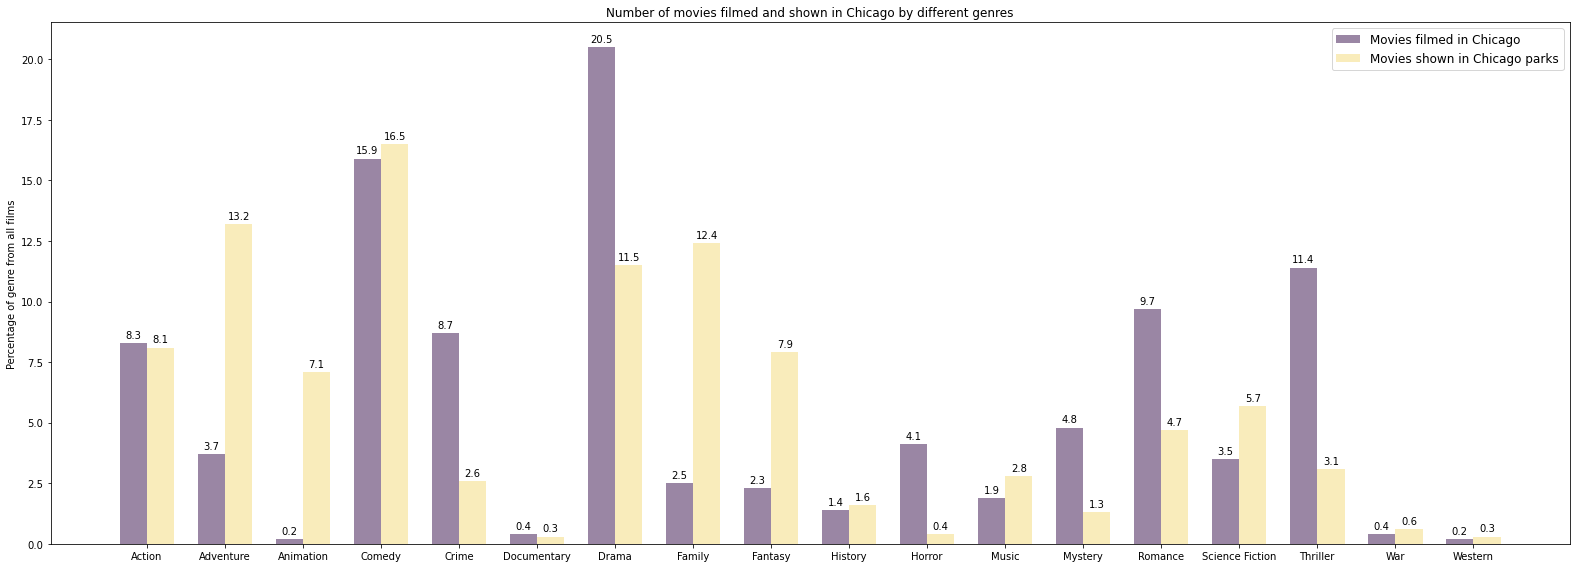

In [50]:
label_arrange = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(22,8))
genre_filmed_graph = ax.bar(label_arrange - width/2, genre_filmed, width, label='Movies filmed in Chicago', color=colors[0])
genre_watched_graph = ax.bar(label_arrange + width/2, genre_watched, width, label='Movies shown in Сhicago parks', color=colors[-1])

ax.set_ylabel('Percentage of genre from all films')
ax.set_title('Number of movies filmed and shown in Chicago by different genres')
plt.xticks(label_arrange, labels)
ax.legend(fontsize='large')

ax.bar_label(genre_filmed_graph, padding=3)
ax.bar_label(genre_watched_graph, padding=3)

fig.tight_layout()

plt.show()

In [51]:
# pie for both
import plotly.express as px 
import plotly.graph_objects as go

In [52]:
colors_pie = ['#9A86A4', '#B1BCE6', '#B6DCF2', '#B7E5DD', '#B6F2C6', '#F1F0C0', '#F9ECBB', '#FDDDB1', '#ADA071', '#5F67AD', '#F2B6B7', '#A65B5D', '#D9FFE3', '#6CA67B', '#E6C5B8','#996D5C', '#A68E85', '#665752', '#4D423D']
def go_pie_chart(df, column_1, column_2, title):
    fig = go.Figure(go.Pie(
    values = df[column_1],
    labels = df[column_2],
    texttemplate = "%{label}<br>%{percent:.1%}",
    textposition = "outside"))
    fig.update_layout(title_text=title,title_y=0.97, title_x=0.05, )
    fig.update_traces(marker=dict(colors=colors_pie))
    fig.update_layout(showlegend=False)
    fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    })
    fig.update_layout(
    font_color="#5D5263",
    title_font_color="#463D4A"
)
    fig.show()

In [53]:
go_pie_chart(df_genres, 'count_genre', 'genre', 'Film genres within movies shot in Chicago')

In [54]:
go_pie_chart(df_watched_genres, 'count_genre', 'genre', 'Film genres within movies on movie nights in Chicago')



---


The graph shows that filmmakers prefer to shoot more *dramas, comedies, thrillers, romantic and crime films* in Chicago

Citizens watch more often *comedies, adventures, family movies and dramas*


---



Next, let's see how the budget affects the profit and the audience's vote. Let's also compare the data for our two categories - filmed and shown in Chicago

Using the `sample()` method, we will select a sample from both dataframes

In [55]:
sample_length = 100
movies_sorted_by_budget = movies_tmdb_data.sample(sample_length).sort_values(by='budget')
watched_movies_sorted_by_budget = film_movie_nights_tmdb_data.sample(sample_length).sort_values(by='budget')

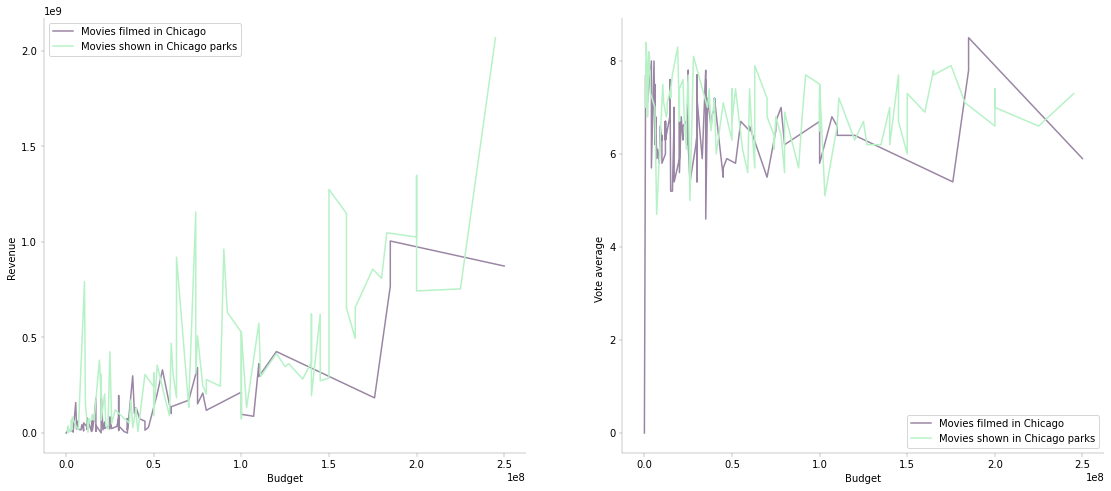

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(19,8))
for x in range(2):
    ax[x].locator_params(integer=True)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].xaxis.set_tick_params(width=0.2)
    ax[x].yaxis.set_tick_params(width=0.2)
    for axis in ['top','bottom','left','right']:
        ax[x].spines[axis].set_linewidth(0.2)

ax[0].plot(movies_sorted_by_budget['budget'], movies_sorted_by_budget['revenue'], color=colors[0], label='Movies filmed in Chicago') 
ax[0].plot(watched_movies_sorted_by_budget['budget'], watched_movies_sorted_by_budget['revenue'], color=colors[-3], label='Movies shown in Chicago parks') 
ax[0].set_ylabel('Revenue', ha='right')
ax[0].set_xlabel('Budget')
ax[0].legend()

ax[1].plot(movies_sorted_by_budget['budget'], movies_sorted_by_budget['vote_average'], color=colors[0], label='Movies filmed in Chicago') 
ax[1].plot(watched_movies_sorted_by_budget['budget'], watched_movies_sorted_by_budget['vote_average'], color=colors[-3], label='Movies shown in Chicago parks') 
ax[1].set_ylabel('Vote average', ha='right')
ax[1].set_xlabel('Budget')
ax[1].legend()

plt.show()

You can see a slight trend of increasing profits from increasing the budget, but still the budget and profit and audience evaluation do not have a relationship.

However, it can be said that films shot in Chicago have approximately the same ratios as film production in general

In [57]:
import scipy.stats as stats

In [58]:
# Shapiro-Wilk test
sp = stats.shapiro(movies_sorted_by_budget['revenue'])
concl = '=> normal distribution' if sp[1]>0.05 else '=> not a normal distribution' 
print('Test for normal distribution Shapiro-Wilk for revenue within shot films: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

Test for normal distribution Shapiro-Wilk for revenue within shot films: W = 0.633 , p-value = 0.000 => not a normal distribution


The Shapiro-Wilk test showed that among the films shot in Chicago, their revenues are not distributed normally. Let's fix this using the box-cox method

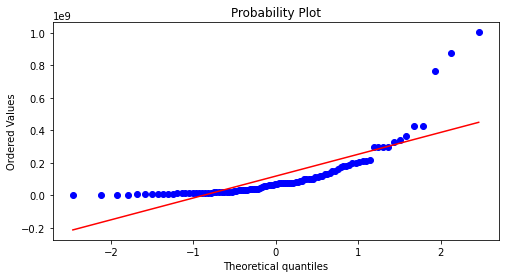

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.probplot(movies_sorted_by_budget['revenue'], dist=stats.norm, plot=ax)

Best lambda parameter = 0.214


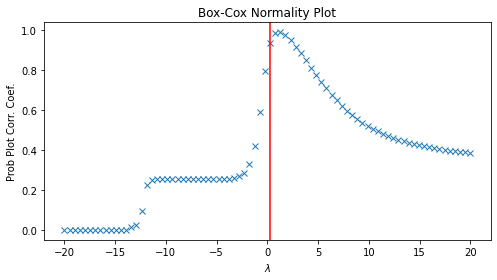

In [60]:
from scipy import stats
movies_sorted_by_budget['revenue'], lmbda = stats.boxcox(movies_sorted_by_budget['revenue'])

print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(movies_sorted_by_budget['revenue'], -20, 20, plot=ax)
ax.axvline(lmbda, color='r')
plt.show()

In [61]:
sp = stats.shapiro(watched_movies_sorted_by_budget['revenue'])
concl = '=> normal distribution' if sp[1]>0.05 else '=> not a normal distribution' 
print('Test for normal distribution Shapiro-Wilk for revenue within shot films: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

Test for normal distribution Shapiro-Wilk for revenue within shot films: W = 0.811 , p-value = 0.000 => not a normal distribution


let's do the same in the date frame, which contains films from movie nights

In [62]:
sp = stats.shapiro(movies_sorted_by_budget['revenue'])
concl = '=> normal distribution' if sp[1]>0.05 else '=> not a normal distribution' 
print('Test for normal distribution Shapiro-Wilk for films on movie nights: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

Test for normal distribution Shapiro-Wilk for films on movie nights: W = 0.983 , p-value = 0.240 => normal distribution


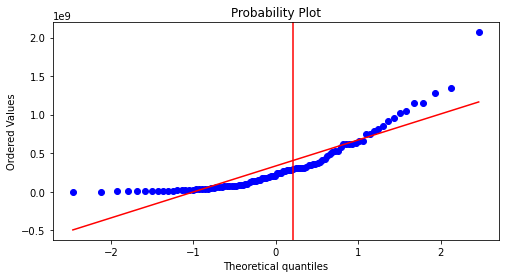

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.probplot(watched_movies_sorted_by_budget['revenue'], dist=stats.norm, plot=ax)
ax.axvline(lmbda, color='r')
plt.show()

Best lambda parameter = 1.0


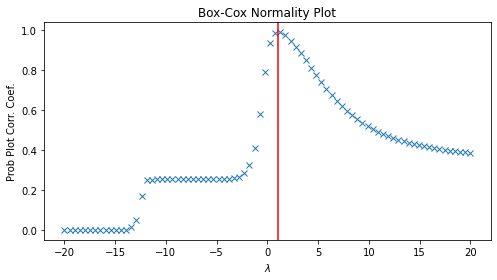

In [64]:
watched_movies_sorted_by_budget['revenue'], lmbda = stats.boxcox(movies_sorted_by_budget['revenue'])
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(watched_movies_sorted_by_budget['revenue'], -20, 20, plot=ax)
ax.axvline(lmbda, color='r')
plt.show()

In [65]:
sp = stats.shapiro(watched_movies_sorted_by_budget['revenue'])
concl = '=> normal distribution' if sp[1]>0.05 else '=> not a normal distribution' 
print('Test for normal distribution Shapiro-Wilk for films on movie nights: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

Test for normal distribution Shapiro-Wilk for films on movie nights: W = 0.983 , p-value = 0.240 => normal distribution


H0 - the average revenue of films shot and shown in parks is the same

H1 - the average revenue of films shot and shown in parks is different

In [66]:
alpha = 0.05
column = 'revenue'

print('For column', column)
print('Means:', round(movies_sorted_by_budget[column].mean(),3), 'vs', round(watched_movies_sorted_by_budget[column].mean(), 3))
print('t-test')
stat, pvalue = stats.ttest_ind(movies_sorted_by_budget[column], watched_movies_sorted_by_budget[column])
print('p-value =', round(pvalue,3))
print('the null hypothesis is rejected and an alternative hypothesis is accepted in its place' if alpha > pvalue / 2 else 'the null hypothesis is accepted')
print()

print('Mann Witneyu-test')
stat, pvalue = stats.mannwhitneyu(movies_sorted_by_budget[column], watched_movies_sorted_by_budget[column], alternative='greater')
print('p-value =', round(pvalue,3))
print('the null hypothesis is rejected and an alternative hypothesis is accepted in its place' if alpha > pvalue else 'the null hypothesis is accepted')
print()

For column revenue
Means: 214.044 vs 212.667
t-test
p-value = 0.881
the null hypothesis is accepted

Mann Witneyu-test
p-value = 0.367
the null hypothesis is accepted



It turns out that there is no difference among revenues of films shot and shown.

Next, we will plot correlations within dataframes

                budget   revenue  vote_average
budget        1.000000  0.700133      0.064114
revenue       0.700133  1.000000      0.309376
vote_average  0.064114  0.309376      1.000000


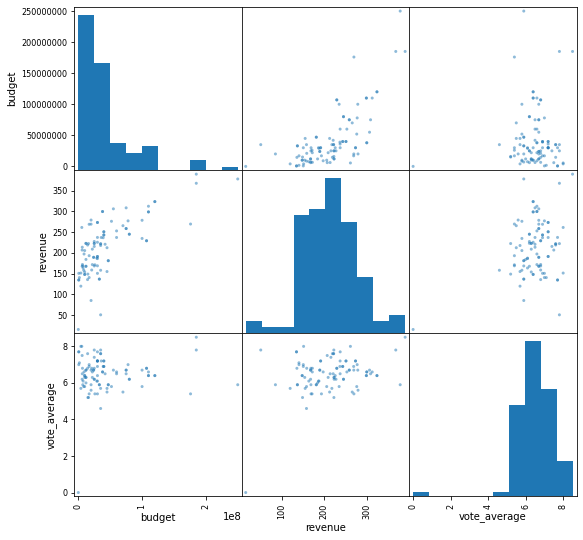

In [67]:
df_stat_multi_shot = movies_sorted_by_budget[['budget', 'revenue', 'vote_average']]
print(df_stat_multi_shot.corr())
pd.plotting.scatter_matrix(df_stat_multi_shot, figsize=(9,9))
plt.show()

                budget   revenue  vote_average
budget        1.000000  0.701545     -0.144653
revenue       0.701545  1.000000     -0.165084
vote_average -0.144653 -0.165084      1.000000


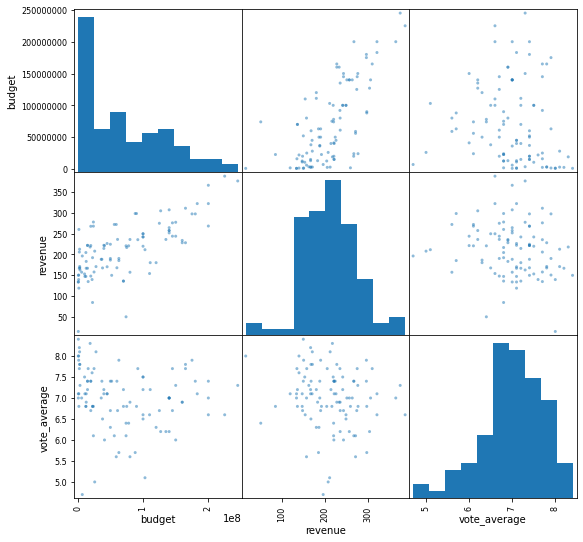

In [68]:
df_stat_multi_watch = watched_movies_sorted_by_budget[['budget', 'revenue', 'vote_average']]
print(df_stat_multi_watch.corr())
pd.plotting.scatter_matrix(df_stat_multi_watch, figsize=(9,9))
plt.show()

According to the tables and graphs, we conclude that there is a high correlation between budgets and revenues, both among the films shot and shown

In [69]:
print(df_stat_multi_watch['revenue'].corr(df_stat_multi_shot['revenue']))

0.04155206743716713


In [70]:
print(df_stat_multi_watch['budget'].corr(df_stat_multi_shot['budget']))

-0.31049090930569084


Low negative correlation only between the budgets of films shot and shown in Chicago

## **Summary**
*Is there a correlation between the films that are made in Chicago and those that are shown at movie nights in the parks in the city?*


# **Conclusion**

As a conclusion, we propose to consider the hypotheses put forward at the beginning of the project.
## Hypotheses

1. **The number of films made in Chicago is growing every year** - ***not proven***.

According to the schedule we have posted, we can see the growth of film production in the early 1900s in Chicago. However, one can observe a strong decline in the last 10 years in the number of films shot in Chicago.

2. **Films shot in Chicago are dominated by the "drama" genre** - ***proven***. 

The most popular genre among films shot in Chicago is drama. Next comes a comedy, and in third place is a thriller

3. **Among the films shown in city parks, the most common genre is "family"** -***partially proven***. 

They show comedies, dramas, adventures, family and fantasy films more often than they shoot

4. **Films that are made and shown in parks are generally similar in terms of budget and revenues** - ***partially proven***. 


The result of the project was a complete descriptive study of films in Chicago from two sides: films that are shot in Chicago and which are shown to residents

Answers were given to all the tasks-questions, hypotheses were refuted or proved.